In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm




In [57]:
margins2018 = pd.read_pickle('margins2018')
demo2018 = pd.read_pickle('demo2018')

In [58]:
basedf = margins2018.merge(demo2018, left_on='district', right_on='Code')

In [59]:
basedf

,pvi,Dem Margin,2016 Clinton Margin,district,Code,Gender,Race/ Ethnicity,col_perc,pres_marg_2012
0,-9,-6.6,-14.7,AK-AL,AK-AL,Man,White - Non-Hispanic,0.292311,-14.1
1,0,4.5,3.0,CA-10,CA-10,Man,White - Non-Hispanic,0.175895,3.6
2,21,48.3,47.6,CA-11,CA-11,Man,White - Non-Hispanic,0.441079,37.6
3,37,73.6,76.6,CA-12,CA-12,Woman,White - Non-Hispanic,0.588627,71.6
4,40,88.4,79.3,CA-13,CA-13,Woman,Black - African-American,0.482248,78.5
...,...,...,...,...,...,...,...,...,...
154,15,43.3,26.4,VT-AL,VT-AL,Man,White - Non-Hispanic,0.373227,35.8
155,1,12.4,9.8,VA-10,VA-10,Woman,White - Non-Hispanic,0.554604,-1.1
156,15,44.2,38.9,VA-11,VA-11,Man,White - Non-Hispanic,0.555172,26.2
157,5,23.1,11.3,WA-10,WA-10,Man,White - Non-Hispanic,0.283161,15.2


In [60]:
yval = basedf.pop('Dem Margin')
basedf.insert(5, 'Dem Margin', yval)

In [61]:
basedf = basedf.drop(['Code', 'Race/ Ethnicity'], axis=1)

In [62]:
basedf = basedf.set_index('district')

In [63]:
basedf

,pvi,2016 Clinton Margin,Gender,Dem Margin,col_perc,pres_marg_2012
district,,,,,,
AK-AL,-9,-14.7,Man,-6.6,0.292311,-14.1
CA-10,0,3.0,Man,4.5,0.175895,3.6
CA-11,21,47.6,Man,48.3,0.441079,37.6
CA-12,37,76.6,Woman,73.6,0.588627,71.6
CA-13,40,79.3,Woman,88.4,0.482248,78.5
...,...,...,...,...,...,...
VT-AL,15,26.4,Man,43.3,0.373227,35.8
VA-10,1,9.8,Woman,12.4,0.554604,-1.1
VA-11,15,38.9,Man,44.2,0.555172,26.2


In [64]:
basedf = pd.get_dummies(basedf)

In [65]:
# yval = basedf.pop('Dem Margin')
# basedf.insert(5, 'Dem Margin', yval)

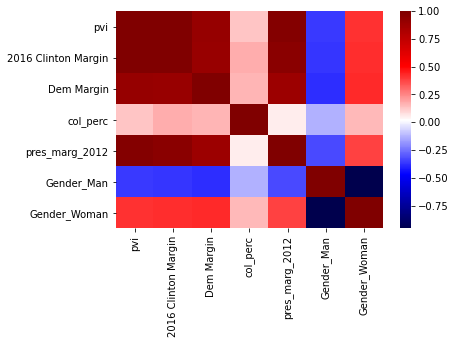

In [73]:
sns.heatmap(basedf.corr(), cmap='seismic')

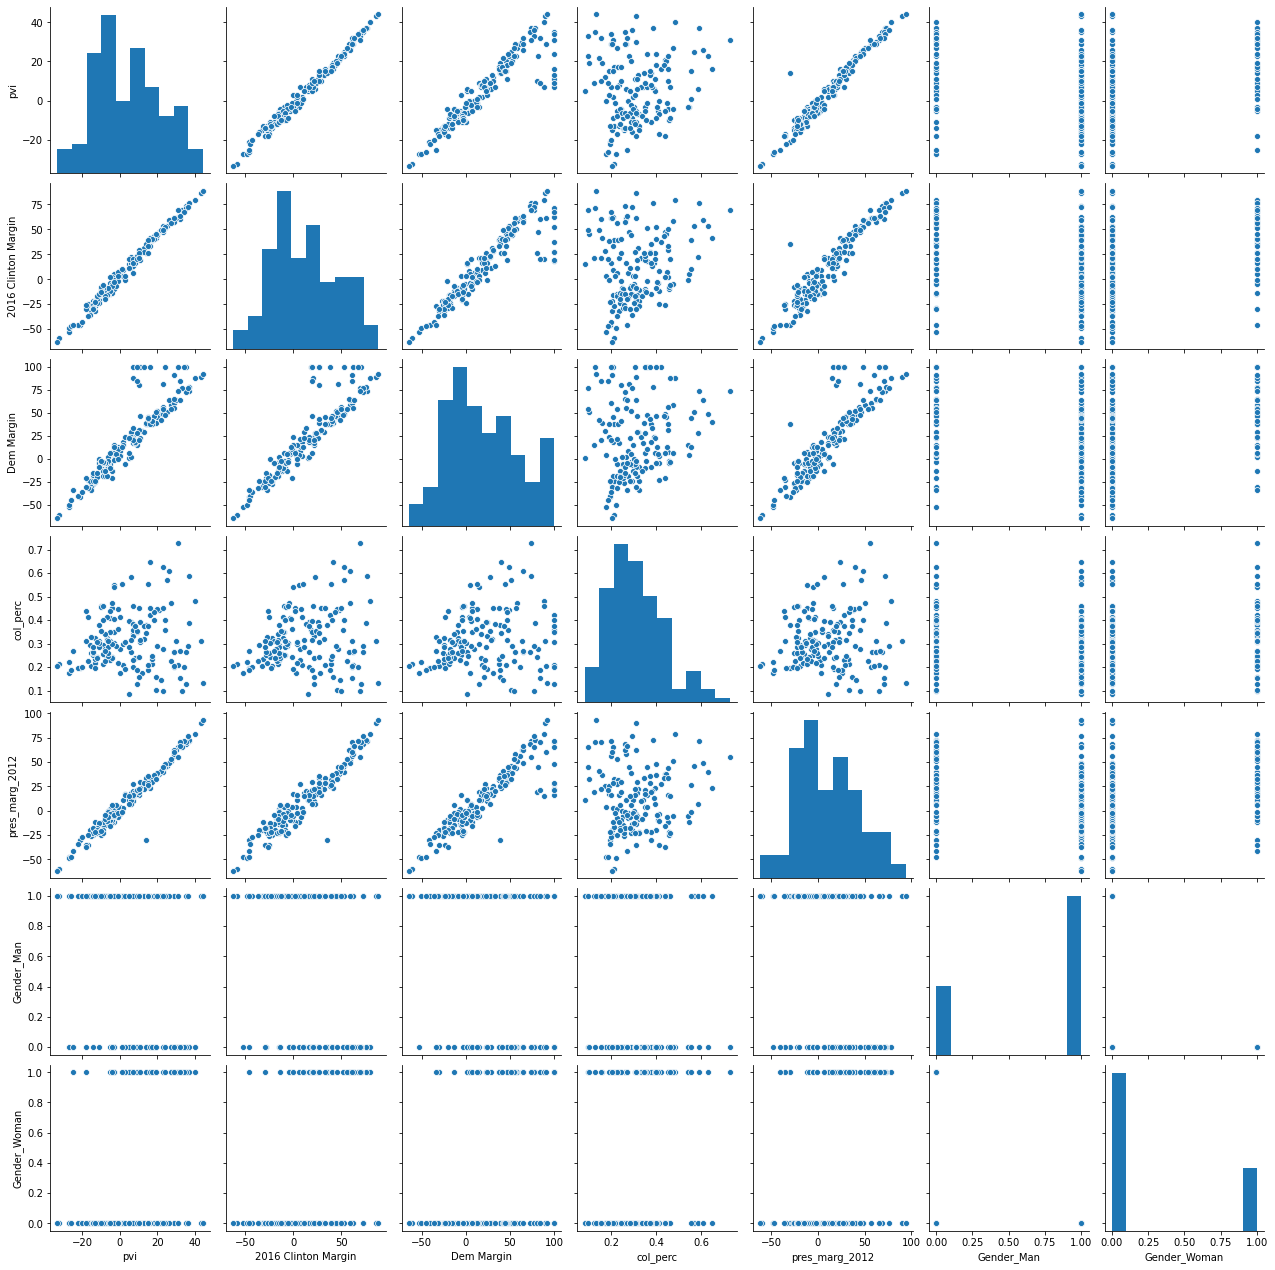

In [66]:
sns.pairplot(basedf)

In [70]:
m = LinearRegression()
m.fit(basedf[['pvi', '2016 Clinton Margin', 'col_perc', 'pres_marg_2012', 'Gender_Man', 'Gender_Woman']], basedf['Dem Margin'])
m.score(basedf[['pvi', '2016 Clinton Margin', 'col_perc', 'pres_marg_2012', 'Gender_Man', 'Gender_Woman']], basedf['Dem Margin'])

0.8333785480743389

In [71]:
m.coef_

array([ 0.55645383,  0.50362035, 12.46768497,  0.27929078, -2.58736035,
        2.93216525])

In [75]:
model = sm.OLS(basedf['Dem Margin'], basedf[['pvi', '2016 Clinton Margin', 'col_perc', 'pres_marg_2012', 'Gender_Man', 'Gender_Woman']])

In [76]:
fit = model.fit()

In [77]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Dem Margin   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              164.9
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                    3.70e-64
Time:                        10:03:32   Log-Likelihood:                         -671.13
No. Observations:                 159   AIC:                                      1354.
Df Residuals:                     153   BIC:                                      1373.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
pvi                     0.4653      1.398      0.333      0.740      -2.297       3.228
2016 Clinton Margin     0.5219      0.485      1.077      0.283      -0.436       1.479
col_perc               14.3812     12.021      1.196      0.233      -9.368      38.131
pres_marg_2012          0.3041      0.292      1.041      0.300      -0.273       0.881
Gender_Man              2.5138      4.168      0.603      0.547      -5.721      10.749
Gender_Woman            8.1246      4.938      1.645      0.102      -1.631      17.880
==============================================================================
Omnibus:                       95.968   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.697
Skew:                           2.372   Prob(JB):                     1.34e-93
Kurtosis:                       9.485   Cond. No.                         511.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""